# Employee Attrition Prediction



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

## Read CSV File

In [2]:
df = pd.read_csv("hr-employee-attrition-with-null.csv")

## Dataset Statistic

In [3]:
df.describe()

,Unnamed: 0,Age,DailyRate,DistanceFromHome,Education,EmployeeCount,EmployeeNumber,EnvironmentSatisfaction,HourlyRate,JobInvolvement,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
count,1470.000000,1176.000000,1176.000000,1176.00000,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,...,1176.000000,1176.0,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000,1176.000000
mean,734.500000,37.134354,798.875850,9.37500,2.920918,1.0,1031.399660,2.733844,65.821429,2.728741,...,2.694728,80.0,0.752551,11.295068,2.787415,2.770408,7.067177,4.290816,2.159014,4.096939
std,424.496761,9.190317,406.957684,8.23049,1.028796,0.0,601.188955,1.092992,20.317323,0.705280,...,1.093660,0.0,0.822550,7.783376,1.290507,0.705004,6.127836,3.630901,3.163524,3.537393
min,0.000000,18.000000,102.000000,1.00000,1.000000,1.0,1.000000,1.000000,30.000000,1.000000,...,1.000000,80.0,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000
25%,367.250000,30.000000,457.750000,2.00000,2.000000,1.0,494.750000,2.000000,48.000000,2.000000,...,2.000000,80.0,0.000000,6.000000,2.000000,2.000000,3.000000,2.000000,0.000000,2.000000
50%,734.500000,36.000000,798.500000,7.00000,3.000000,1.0,1027.500000,3.000000,66.000000,3.000000,...,3.000000,80.0,1.000000,10.000000,3.000000,3.000000,5.000000,3.000000,1.000000,3.000000
75%,1101.750000,43.000000,1168.250000,15.00000,4.000000,1.0,1562.250000,4.000000,84.000000,3.000000,...,4.000000,80.0,1.000000,15.000000,3.000000,3.000000,10.000000,7.000000,2.250000,7.000000
max,1469.000000,60.000000,1499.000000,29.00000,5.000000,1.0,2068.000000,4.000000,100.000000,4.000000,...,4.000000,80.0,3.000000,40.000000,6.000000,4.000000,37.000000,18.000000,15.000000,17.000000


In [4]:
df.head()

,Unnamed: 0,Age,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,EmployeeCount,...,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,0,41.0,Yes,Travel_Rarely,NaN,NaN,1.0,NaN,Life Sciences,1.0,...,1.0,80.0,0.0,8.0,0.0,NaN,6.0,NaN,0.0,NaN
1,1,NaN,No,NaN,279.0,Research & Development,NaN,NaN,Life Sciences,1.0,...,4.0,NaN,1.0,10.0,NaN,3.0,10.0,NaN,NaN,7.0
2,2,37.0,Yes,NaN,1373.0,NaN,2.0,2.0,NaN,1.0,...,NaN,80.0,0.0,7.0,3.0,NaN,NaN,0.0,NaN,0.0
3,3,NaN,No,Travel_Frequently,1392.0,Research & Development,3.0,4.0,Life Sciences,NaN,...,3.0,NaN,NaN,8.0,3.0,NaN,8.0,NaN,3.0,0.0
4,4,27.0,No,Travel_Rarely,591.0,Research & Development,2.0,1.0,Medical,1.0,...,4.0,80.0,1.0,6.0,NaN,3.0,2.0,2.0,2.0,NaN


---

## Feature transformation

In [5]:
df.loc[df["Attrition"] == "no", "Attrition"] = 0.0
df.loc[df["Attrition"] == "yes", "Attrition"] = 1.0

string_categorical_col = [
    "Department", "Attrition", "BusinessTravel",
    "EducationField", "Gender", "JobRole",
    "MaritalStatus", "Over18", "OverTime"
]

# ENCODE STRING COLUMNS TO CATEGORICAL COLUMNS
for col in string_categorical_col:
    # INSERT CODE HERE
    df[col] = df[col].astype("category").cat.codes

# HANDLE NULL NUMBERS
# INSERT CODE HERE
df = df.fillna(df.median())
df = df.loc[:, ~df.columns.isin(["EmployeeNumber", "Unnamed: 0", "EmployeeCount", "StandardHours", "Over18"])]

###  Spliting data into train and test

In [6]:
from sklearn.model_selection import train_test_split

In [7]:
df_train, df_test = train_test_split(df, test_size=0.2, random_state=42)

### Display histogram of each feature

In [8]:
def display_histogram(df, col_name, cls, n_bin = 40):
    # INSERT CODE HERE
    # Filter data by Attrition == cls
    data = df[df["Attrition"] == cls][col_name]

    plt.figure(figsize=(8, 5))

    counts, bins, _ = plt.hist(
        data,
        bins=n_bin,
        alpha=0.7
    )

    zero_bins = np.sum(counts == 0)

    plt.xlabel(col_name)
    plt.ylabel("Count")
    plt.title(f"{col_name} (Attrition = {cls})")
    plt.grid(True)

    plt.show()

    print(f"Number of bins with zero counts: {zero_bins}")

---

## Problems

### Problem T4

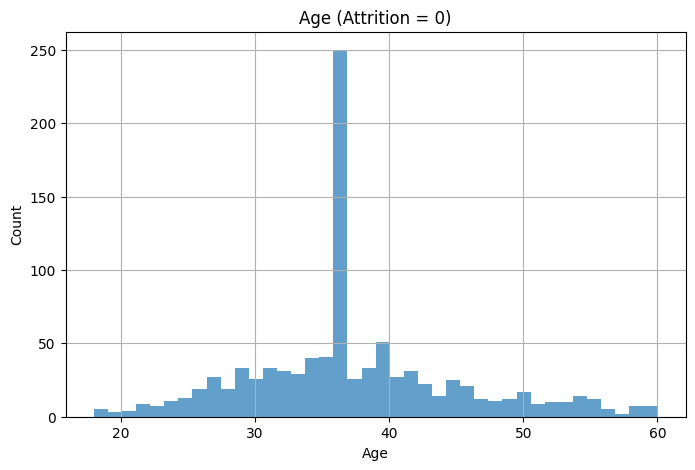

Number of bins with zero counts: 0


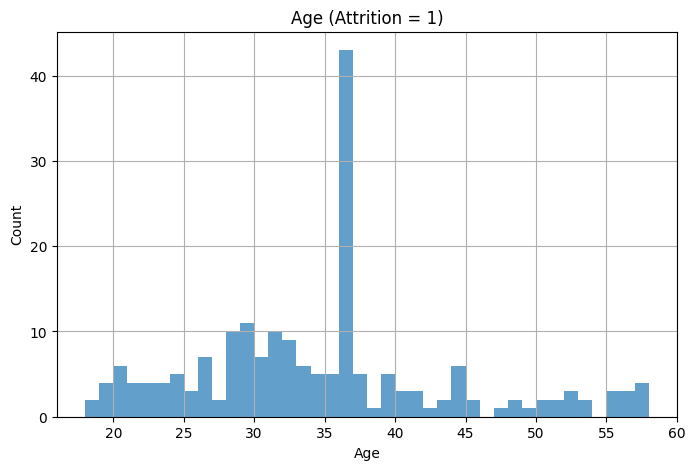

Number of bins with zero counts: 2


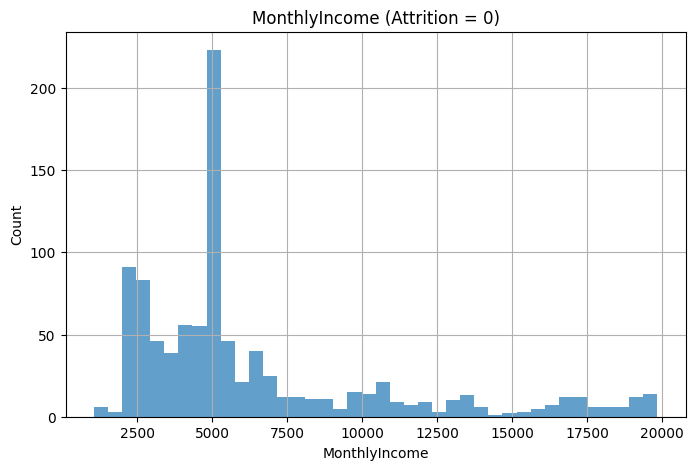

Number of bins with zero counts: 0


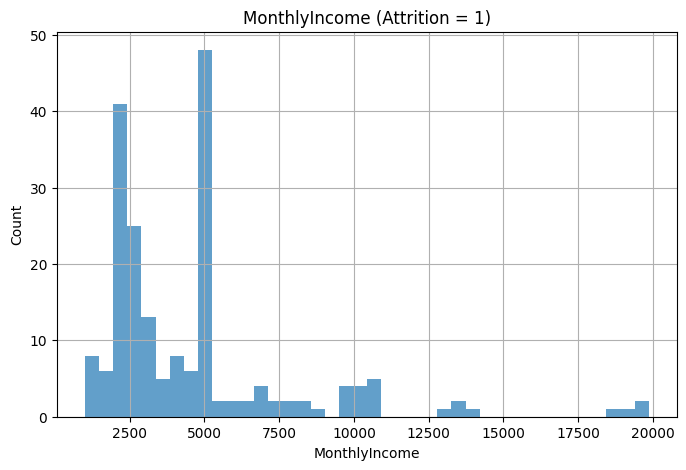

Number of bins with zero counts: 14


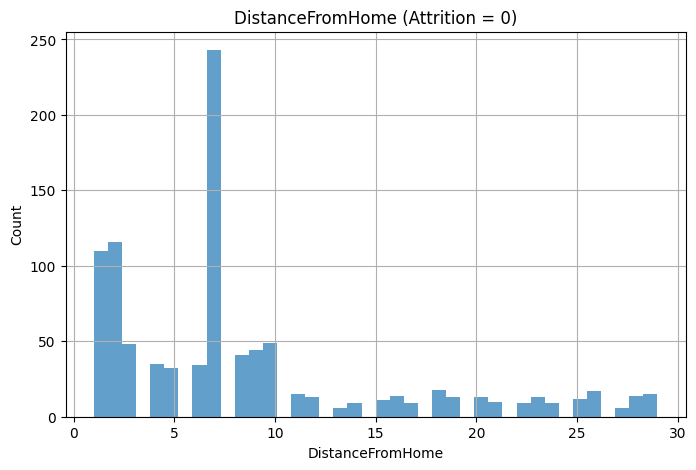

Number of bins with zero counts: 11


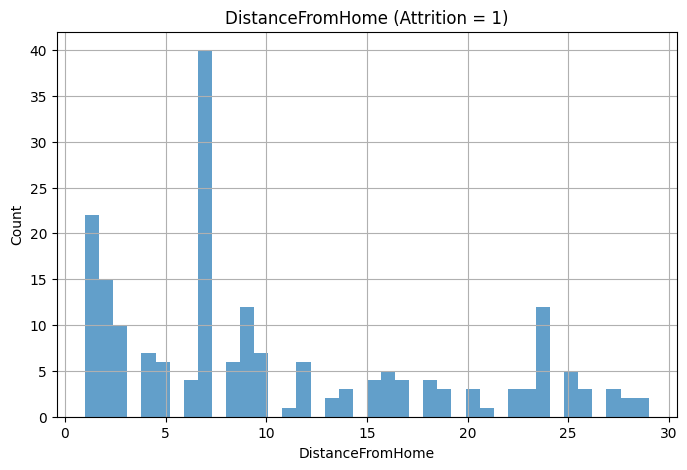

Number of bins with zero counts: 11


In [9]:
display_histogram(df_train, "Age", 0)
display_histogram(df_train, "Age", 1)

display_histogram(df_train, "MonthlyIncome", 0)
display_histogram(df_train, "MonthlyIncome", 1)

display_histogram(df_train, "DistanceFromHome", 0)
display_histogram(df_train, "DistanceFromHome", 1)

Number of bins with zero counts in Age (Attrition = 0): 0
Number of bins with zero counts in Age (Attrition = 1): 2
Number of bins with zero counts in MonthlyIncome (Attrition = 0): 0
Number of bins with zero counts in MonthlyIncome (Attrition = 1): 14
Number of bins with zero counts in DistanceFromHome (Attrition = 0): 11
Number of bins with zero counts in DistanceFromHome (Attrition = 1): 11


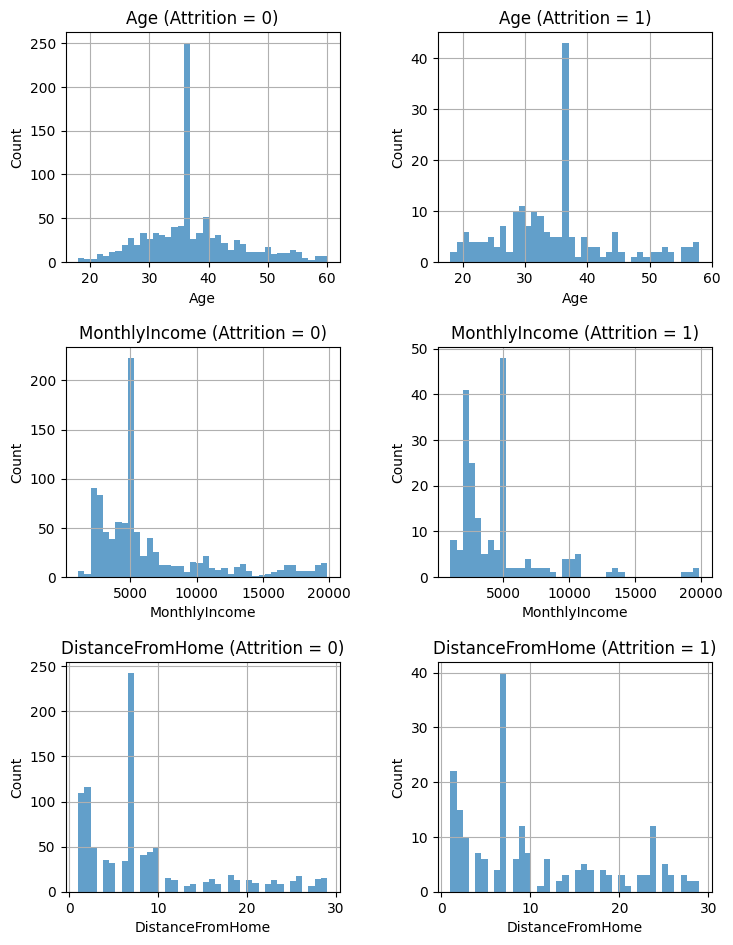

In [10]:
fig, axes = plt.subplots(3, 2, figsize=(8, 10))
fig.tight_layout(pad=4.0)

col_names = ["Age", "MonthlyIncome", "DistanceFromHome"]
attrition_classes = [0, 1]

for i, col_name in enumerate(col_names):
    for j, cls in enumerate(attrition_classes):
        ax = axes[i, j]
        data = df_train[df_train["Attrition"] == cls][col_name]

        counts, bins, _ = ax.hist(
            data,
            bins=40,
            alpha=0.7
        )

        zero_bins = np.sum(counts == 0)

        ax.set_xlabel(col_name)
        ax.set_ylabel("Count")
        ax.set_title(f"{col_name} (Attrition = {cls})")
        ax.grid(True)

        print(f"Number of bins with zero counts in {col_name} (Attrition = {cls}): {zero_bins}")

plt.savefig("../images/Histogram-T4.png", dpi=300)
plt.show()

---

### Problem T6

In [11]:
def discretize_feature(values, n_bins):
    min_val = np.min(values)
    max_val = np.max(values)

    # Internal bin edges (exclude -inf, +inf)
    bin_edges = np.linspace(min_val, max_val, n_bins - 1)

    # Assign bins
    bin_indices = np.digitize(values, bin_edges)

    # Count samples per bin
    counts = np.bincount(bin_indices, minlength=n_bins)

    return counts, bin_edges

Zero-count bins in Age (bins=10): 2
Zero-count bins in Age (bins=40): 5
Zero-count bins in Age (bins=100): 119
Zero-count bins in MonthlyIncome (bins=10): 3
Zero-count bins in MonthlyIncome (bins=40): 16
Zero-count bins in MonthlyIncome (bins=100): 57
Zero-count bins in DistanceFromHome (bins=10): 2
Zero-count bins in DistanceFromHome (bins=40): 22
Zero-count bins in DistanceFromHome (bins=100): 142


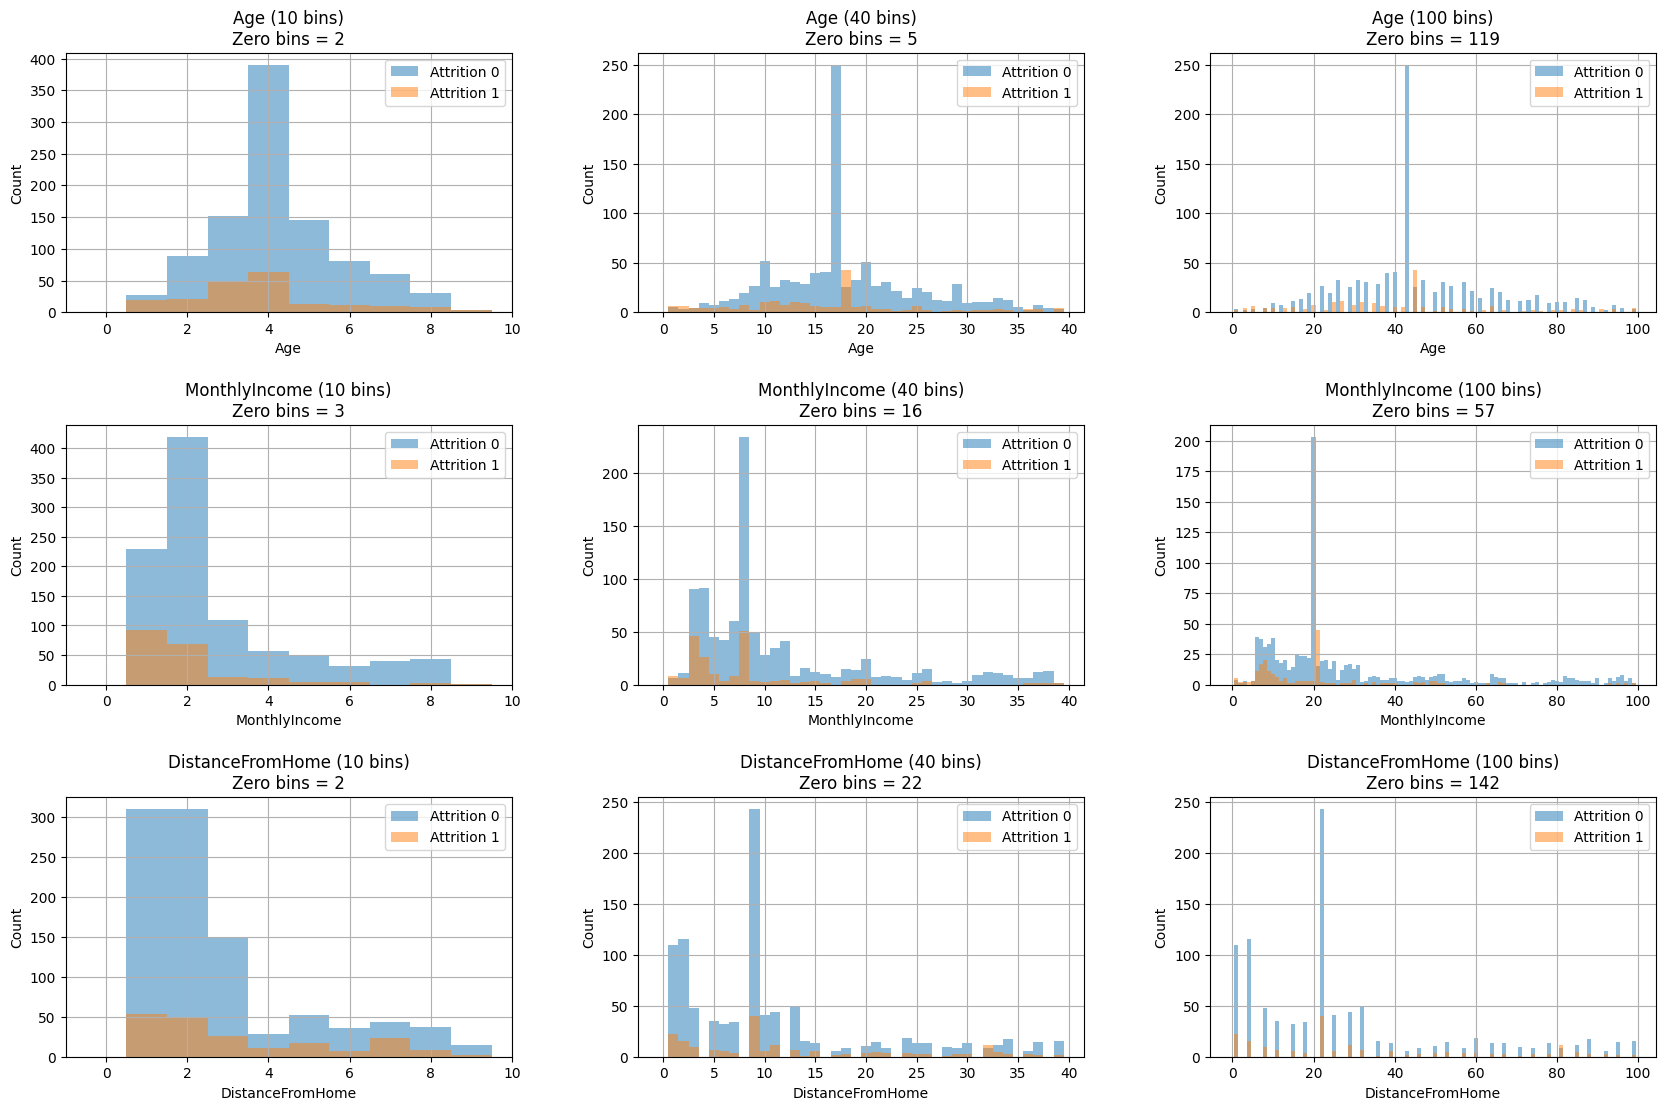

In [12]:
fig, axes = plt.subplots(3, 3, figsize=(18, 12))
fig.tight_layout(pad=6.0)

col_names = ["Age", "MonthlyIncome", "DistanceFromHome"]
bin_number_list = [10, 40, 100]
attrition_classes = [0, 1]

for i, col_name in enumerate(col_names):
    for j, n_bin in enumerate(bin_number_list):
        ax = axes[i, j]

        total_zero_bins = 0

        for cls in attrition_classes:
            data = df_train[df_train["Attrition"] == cls][col_name].values

            counts, bin_edges = discretize_feature(data, n_bin)

            # Plot as bar chart (manual histogram)
            ax.bar(
                range(n_bin),
                counts,
                width=1,
                alpha=0.5,
                label=f"Attrition {cls}"
            )

            zero_bins = np.sum(counts == 0)
            total_zero_bins += zero_bins

        ax.set_xlabel(col_name)
        ax.set_ylabel("Count")
        ax.set_title(f"{col_name} ({n_bin} bins)\nZero bins = {total_zero_bins}")
        ax.legend()
        ax.grid(True)

        print(
            f"Zero-count bins in {col_name} (bins={n_bin}): {total_zero_bins}"
        )

plt.savefig("../images/Histogram-T6.png", dpi=300)
plt.show()

---

### Problem T7

In [13]:
print(df_train.columns)
print(len(df_train.columns))

Index(['Age', 'Attrition', 'BusinessTravel', 'DailyRate', 'Department',
       'DistanceFromHome', 'Education', 'EducationField',
       'EnvironmentSatisfaction', 'Gender', 'HourlyRate', 'JobInvolvement',
       'JobLevel', 'JobRole', 'JobSatisfaction', 'MaritalStatus',
       'MonthlyIncome', 'MonthlyRate', 'NumCompaniesWorked', 'OverTime',
       'PercentSalaryHike', 'PerformanceRating', 'RelationshipSatisfaction',
       'StockOptionLevel', 'TotalWorkingYears', 'TrainingTimesLastYear',
       'WorkLifeBalance', 'YearsAtCompany', 'YearsInCurrentRole',
       'YearsSinceLastPromotion', 'YearsWithCurrManager'],
      dtype='object')
31


Zero-count bins in Attrition (Attrition = 0): 9
Zero-count bins in Attrition (Attrition = 1): 9
Zero-count bins in BusinessTravel (Attrition = 0): 6
Zero-count bins in BusinessTravel (Attrition = 1): 6
Zero-count bins in DailyRate (Attrition = 0): 0
Zero-count bins in DailyRate (Attrition = 1): 0
Zero-count bins in Department (Attrition = 0): 6
Zero-count bins in Department (Attrition = 1): 6
Zero-count bins in Education (Attrition = 0): 5
Zero-count bins in Education (Attrition = 1): 5
Zero-count bins in EducationField (Attrition = 0): 3
Zero-count bins in EducationField (Attrition = 1): 3
Zero-count bins in EnvironmentSatisfaction (Attrition = 0): 6
Zero-count bins in EnvironmentSatisfaction (Attrition = 1): 6
Zero-count bins in Gender (Attrition = 0): 7
Zero-count bins in Gender (Attrition = 1): 7
Zero-count bins in HourlyRate (Attrition = 0): 0
Zero-count bins in HourlyRate (Attrition = 1): 0
Zero-count bins in JobInvolvement (Attrition = 0): 6
Zero-count bins in JobInvolvement (At

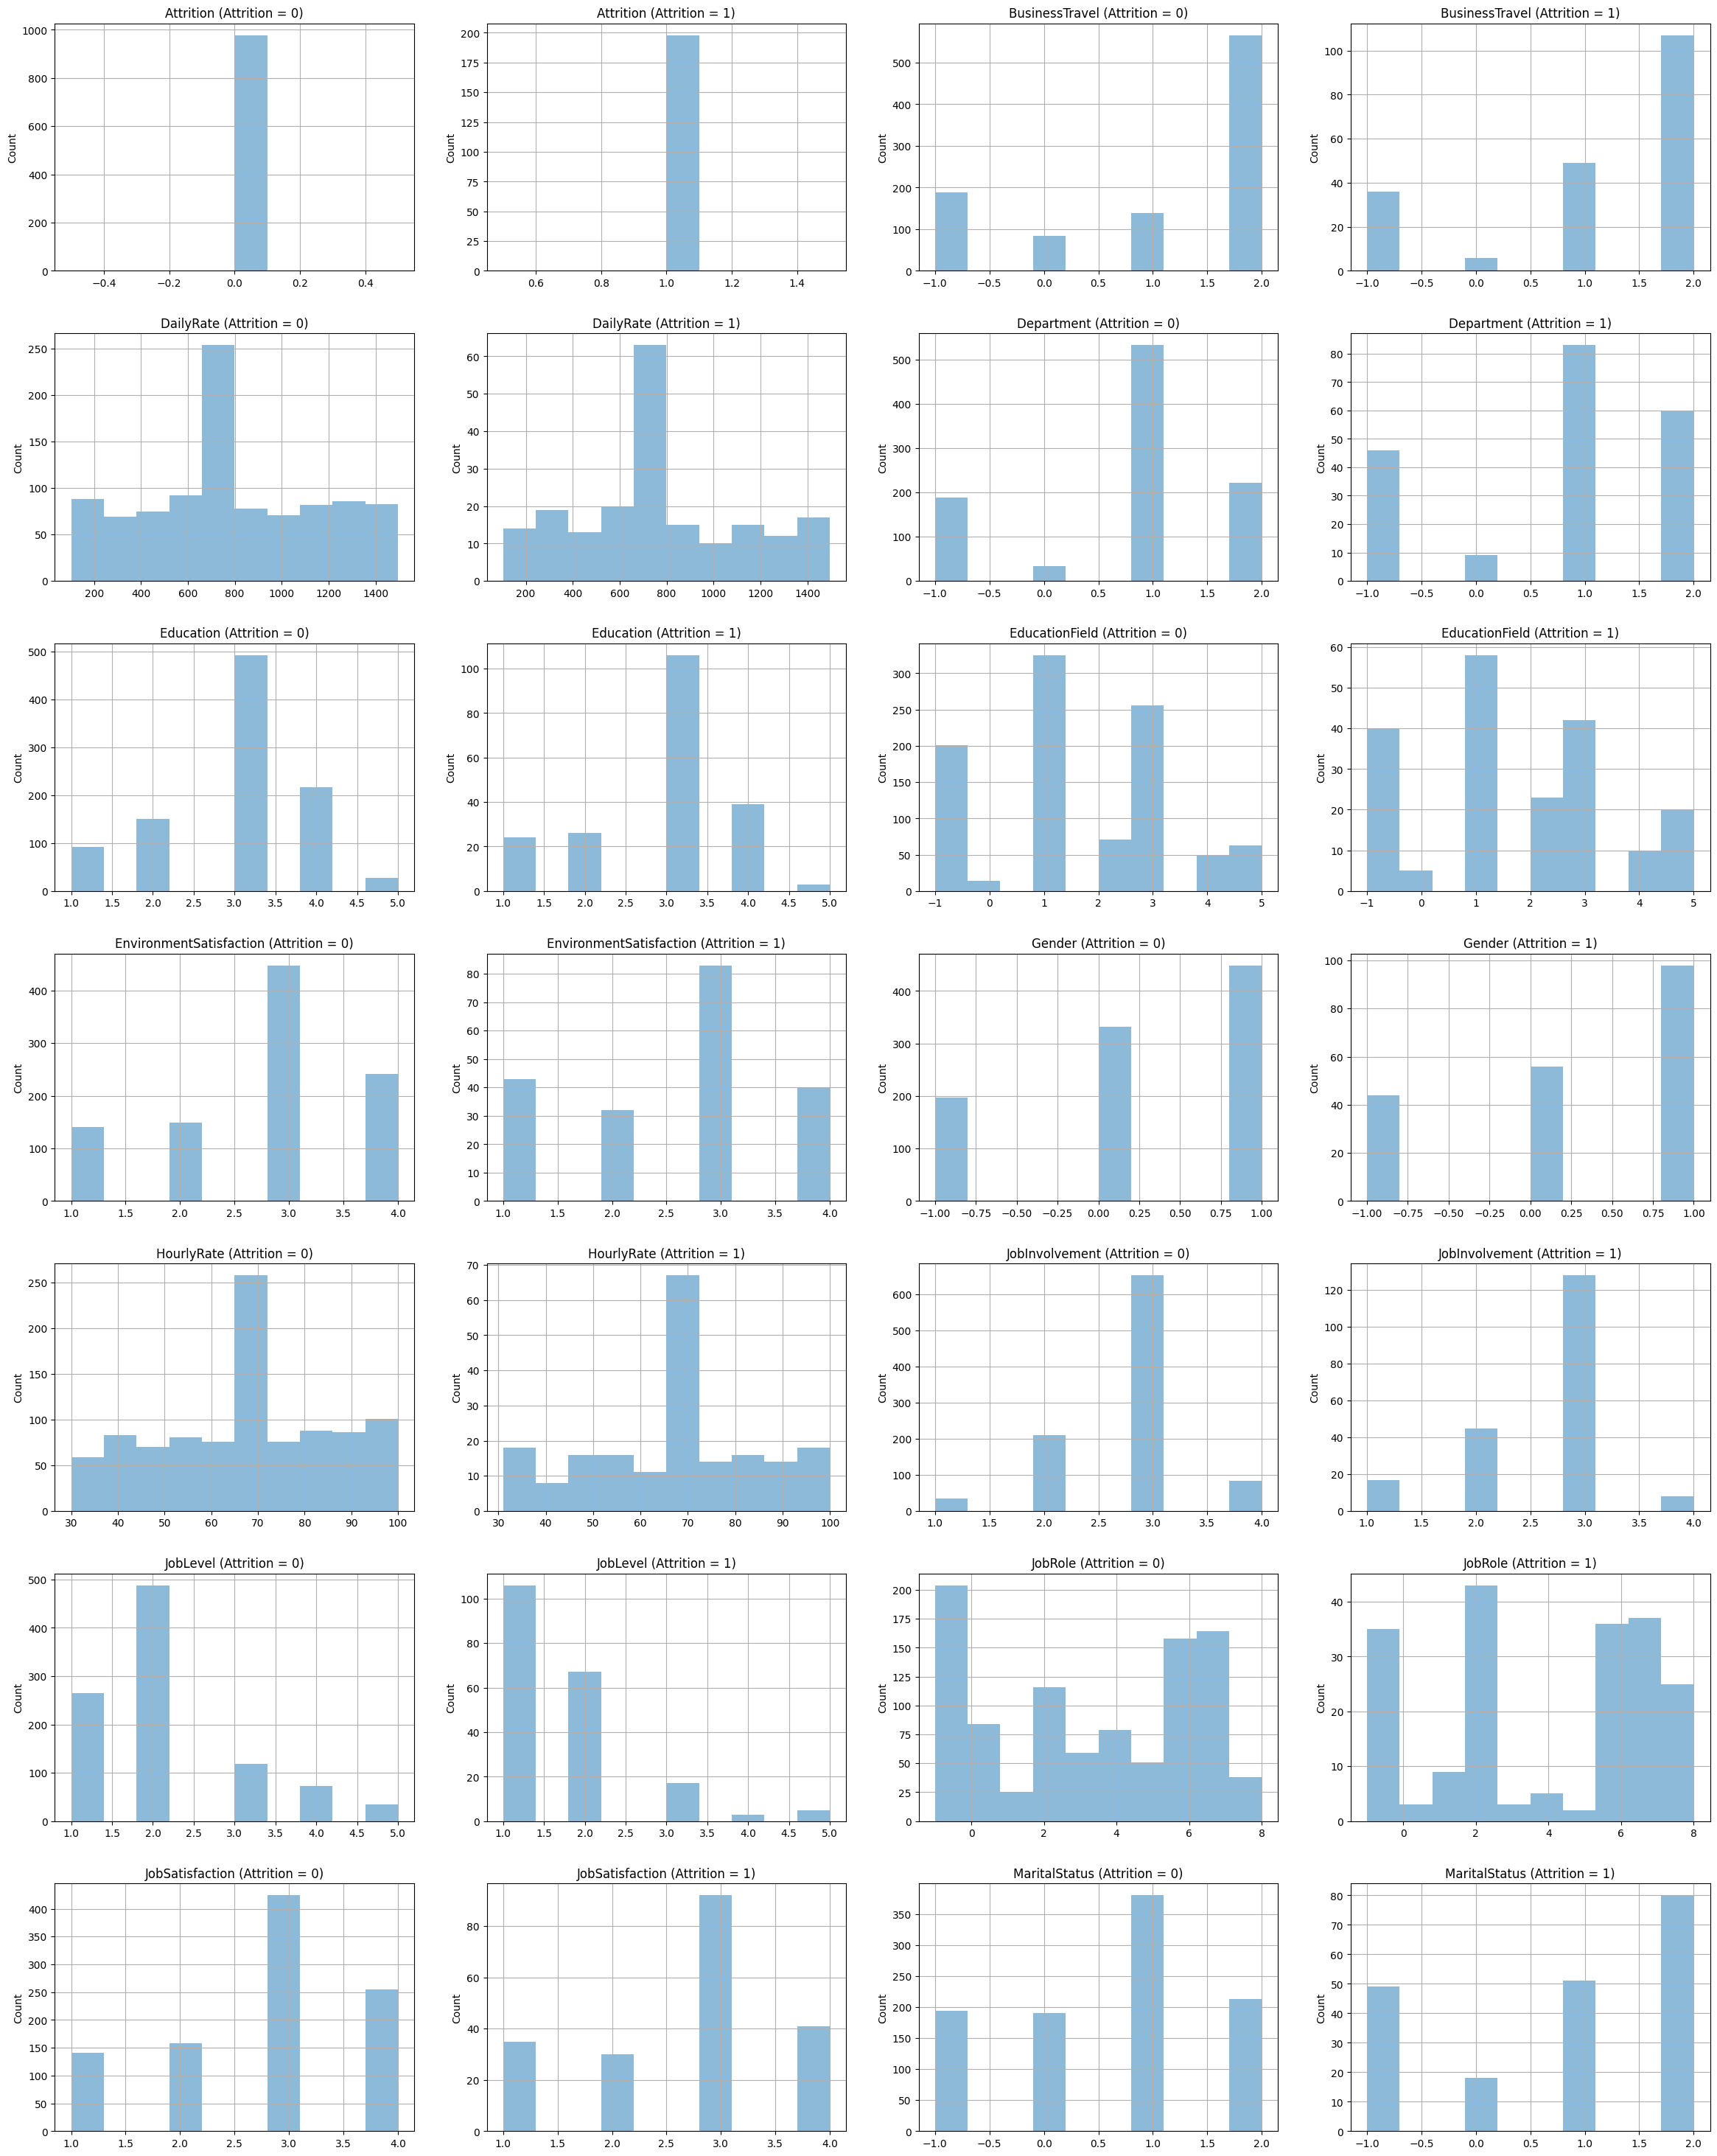

Zero-count bins in MonthlyRate (Attrition = 0): 0
Zero-count bins in MonthlyRate (Attrition = 1): 0
Zero-count bins in NumCompaniesWorked (Attrition = 0): 0
Zero-count bins in NumCompaniesWorked (Attrition = 1): 0
Zero-count bins in OverTime (Attrition = 0): 7
Zero-count bins in OverTime (Attrition = 1): 7
Zero-count bins in PercentSalaryHike (Attrition = 0): 0
Zero-count bins in PercentSalaryHike (Attrition = 1): 0
Zero-count bins in PerformanceRating (Attrition = 0): 8
Zero-count bins in PerformanceRating (Attrition = 1): 8
Zero-count bins in RelationshipSatisfaction (Attrition = 0): 6
Zero-count bins in RelationshipSatisfaction (Attrition = 1): 6
Zero-count bins in StockOptionLevel (Attrition = 0): 6
Zero-count bins in StockOptionLevel (Attrition = 1): 6
Zero-count bins in TotalWorkingYears (Attrition = 0): 0
Zero-count bins in TotalWorkingYears (Attrition = 1): 0
Zero-count bins in TrainingTimesLastYear (Attrition = 0): 3
Zero-count bins in TrainingTimesLastYear (Attrition = 1): 3


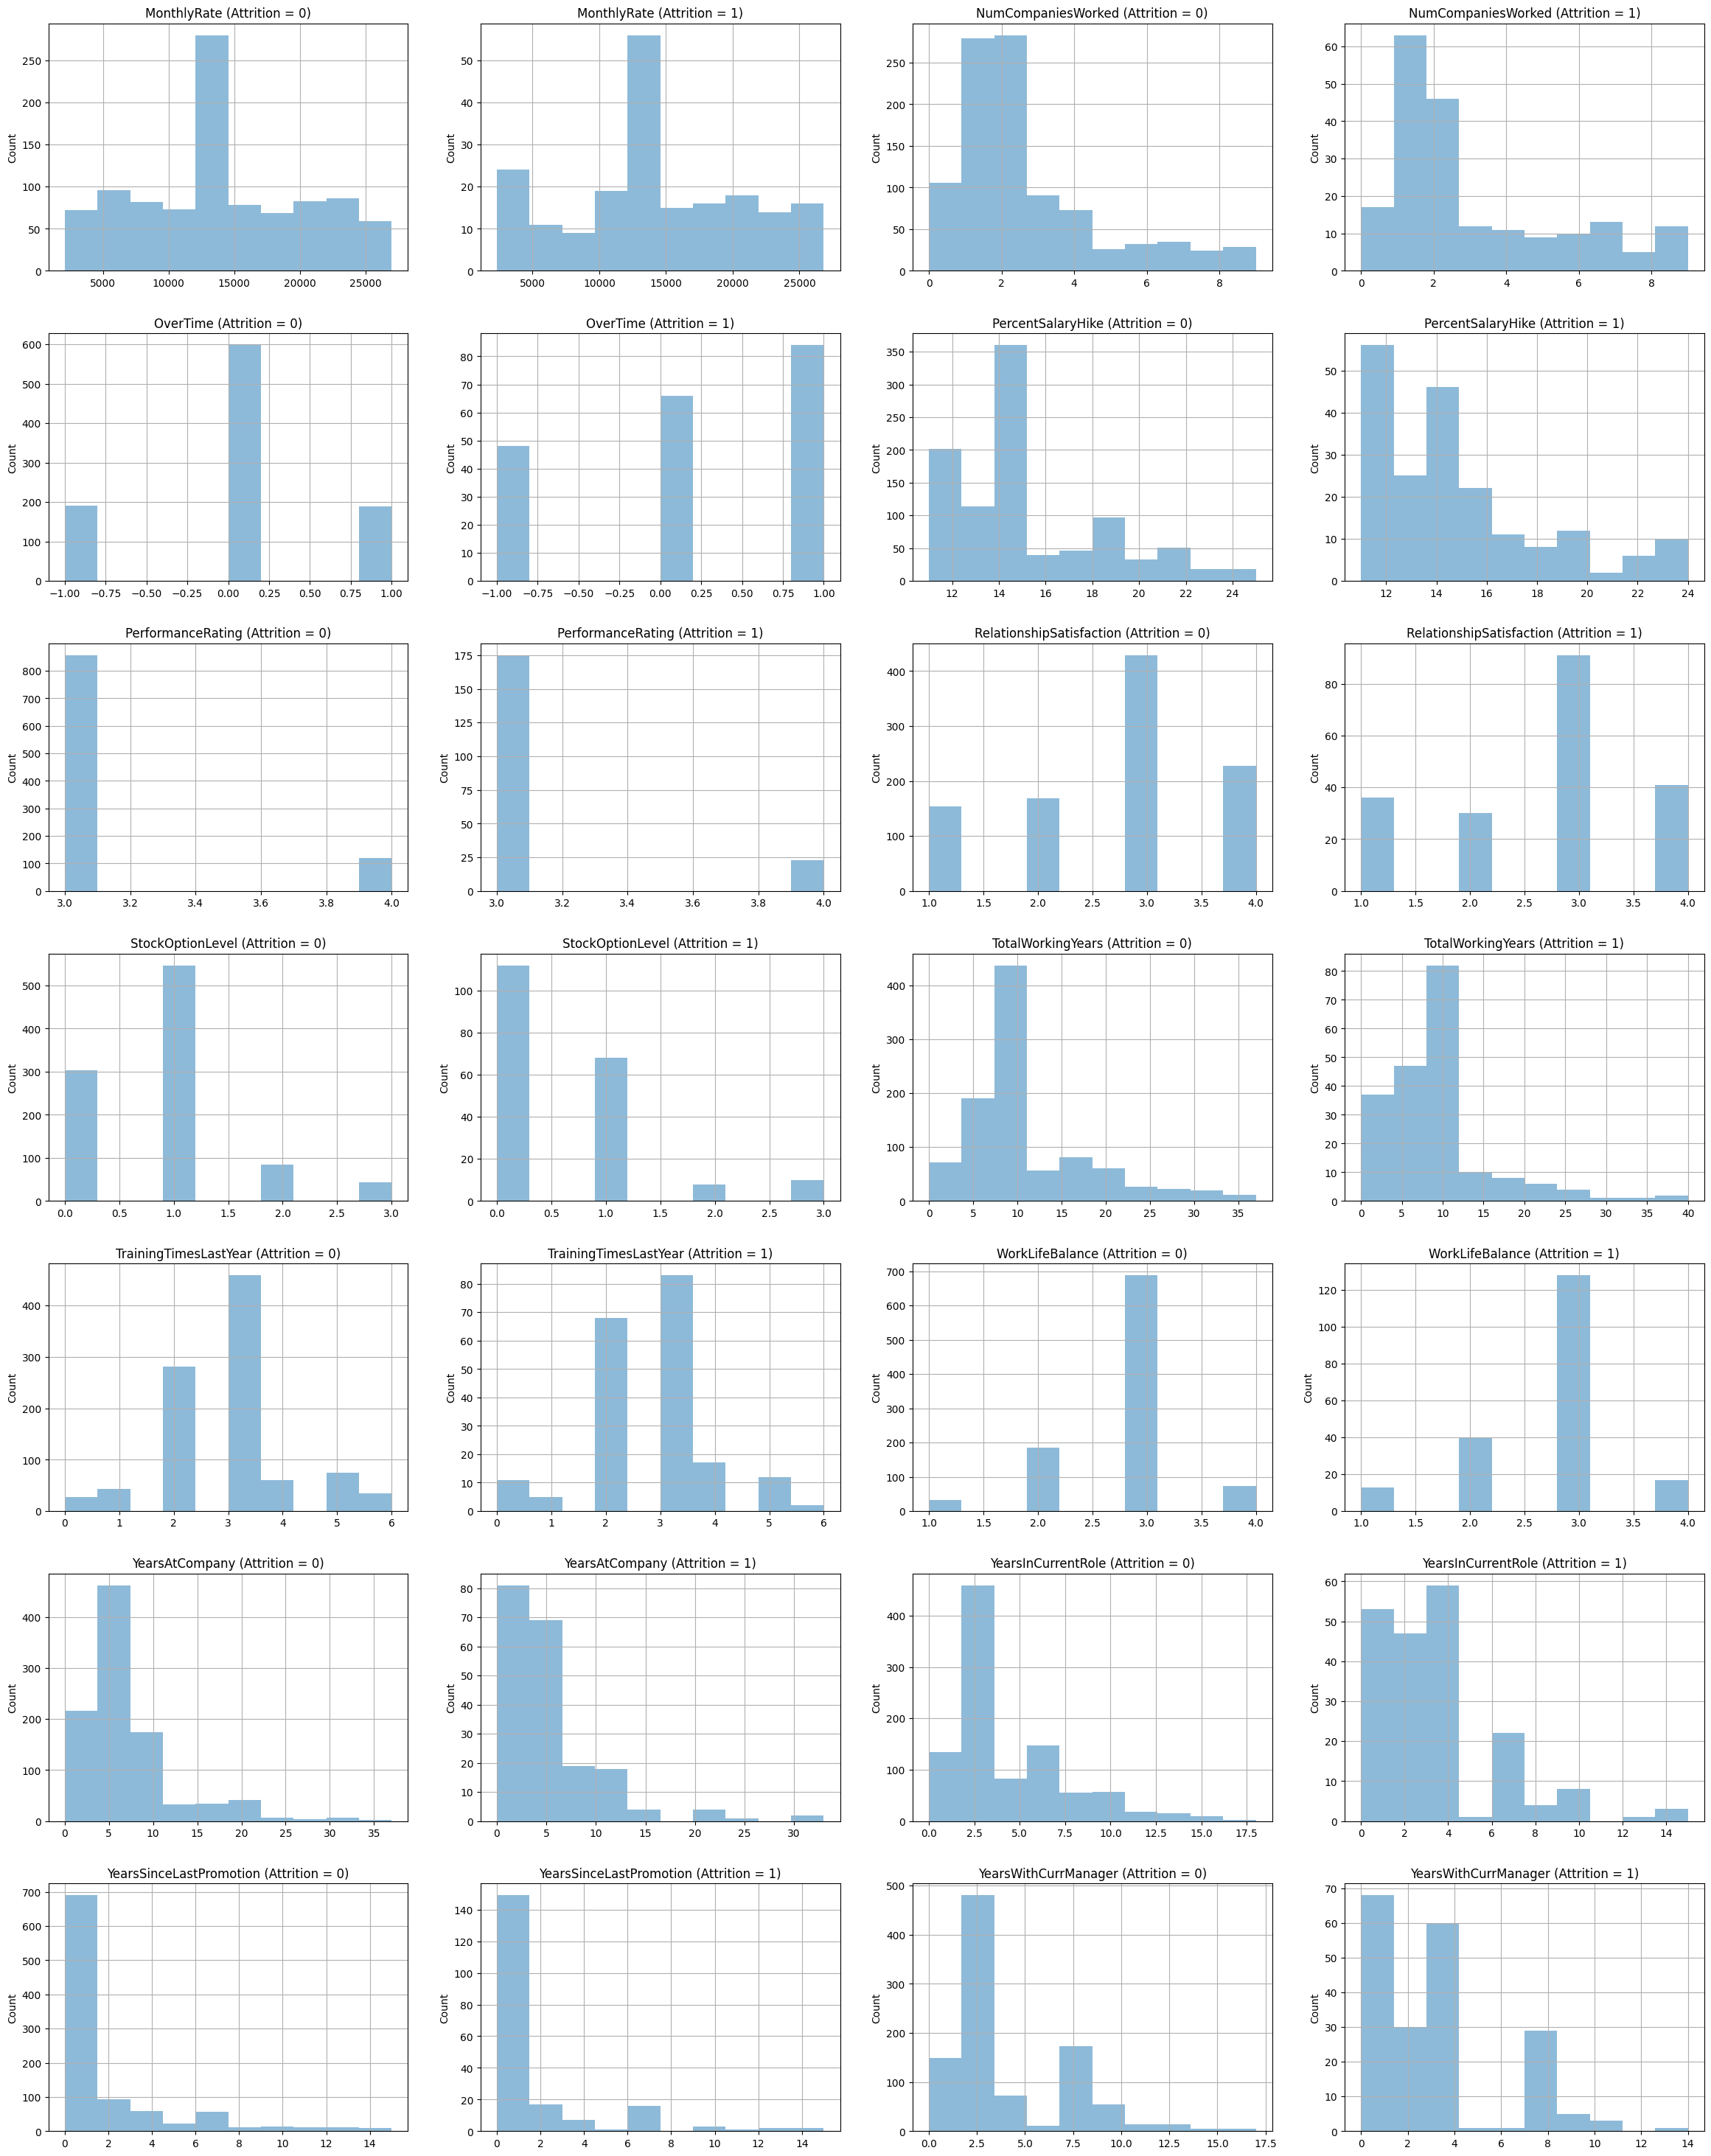

In [14]:
# No need to consider "Age", "MonthlyIncome", and "DistanceFromHome"
# since they are already discretized for histogram modeling.

fig, axes = plt.subplots(7, 4, figsize=(24, 30))
fig.tight_layout(pad=4.0)

idx = 0
for col in df_train.columns:
    if col not in ["Age", "MonthlyIncome", "DistanceFromHome"]:
            
        if idx == 14:
            plt.savefig("../images/Histogram-T7-1.png", dpi=300)
            plt.show()

            fig, axes = plt.subplots(7, 4, figsize=(24, 30))
            fig.tight_layout(pad=4.0)
            
            idx = 0
        
        for a in range(2):
            ax = axes[idx // 2, (idx % 2) * 2 + a]
            data = df_train[df_train["Attrition"] == a][col].values
            
            counts, bins, _ = ax.hist(
                data,
                bins=10,
                alpha=0.5
            )

            zero_bins = np.sum(counts == 0)

            ax.set_ylabel("Count")
            ax.set_title(f"{col} (Attrition = {a})")
            ax.grid(True)

            print(f"Zero-count bins in {col} (Attrition = {a}): {zero_bins}")

        idx += 1

plt.savefig("../images/Histogram-T7-2.png", dpi=300)
plt.show()

Zero-count bins in Age: 2
Zero-count bins in DistanceFromHome: 2
Zero-count bins in JobLevel: 10
Zero-count bins in JobRole: 2
Zero-count bins in MonthlyRate: 2
Zero-count bins in OverTime: 14
Zero-count bins in PercentSalaryHike: 2
Zero-count bins in StockOptionLevel: 12
Zero-count bins in TotalWorkingYears: 3
Zero-count bins in YearsAtCompany: 3
Zero-count bins in YearsInCurrentRole: 2
Zero-count bins in YearsWithCurrManager: 3


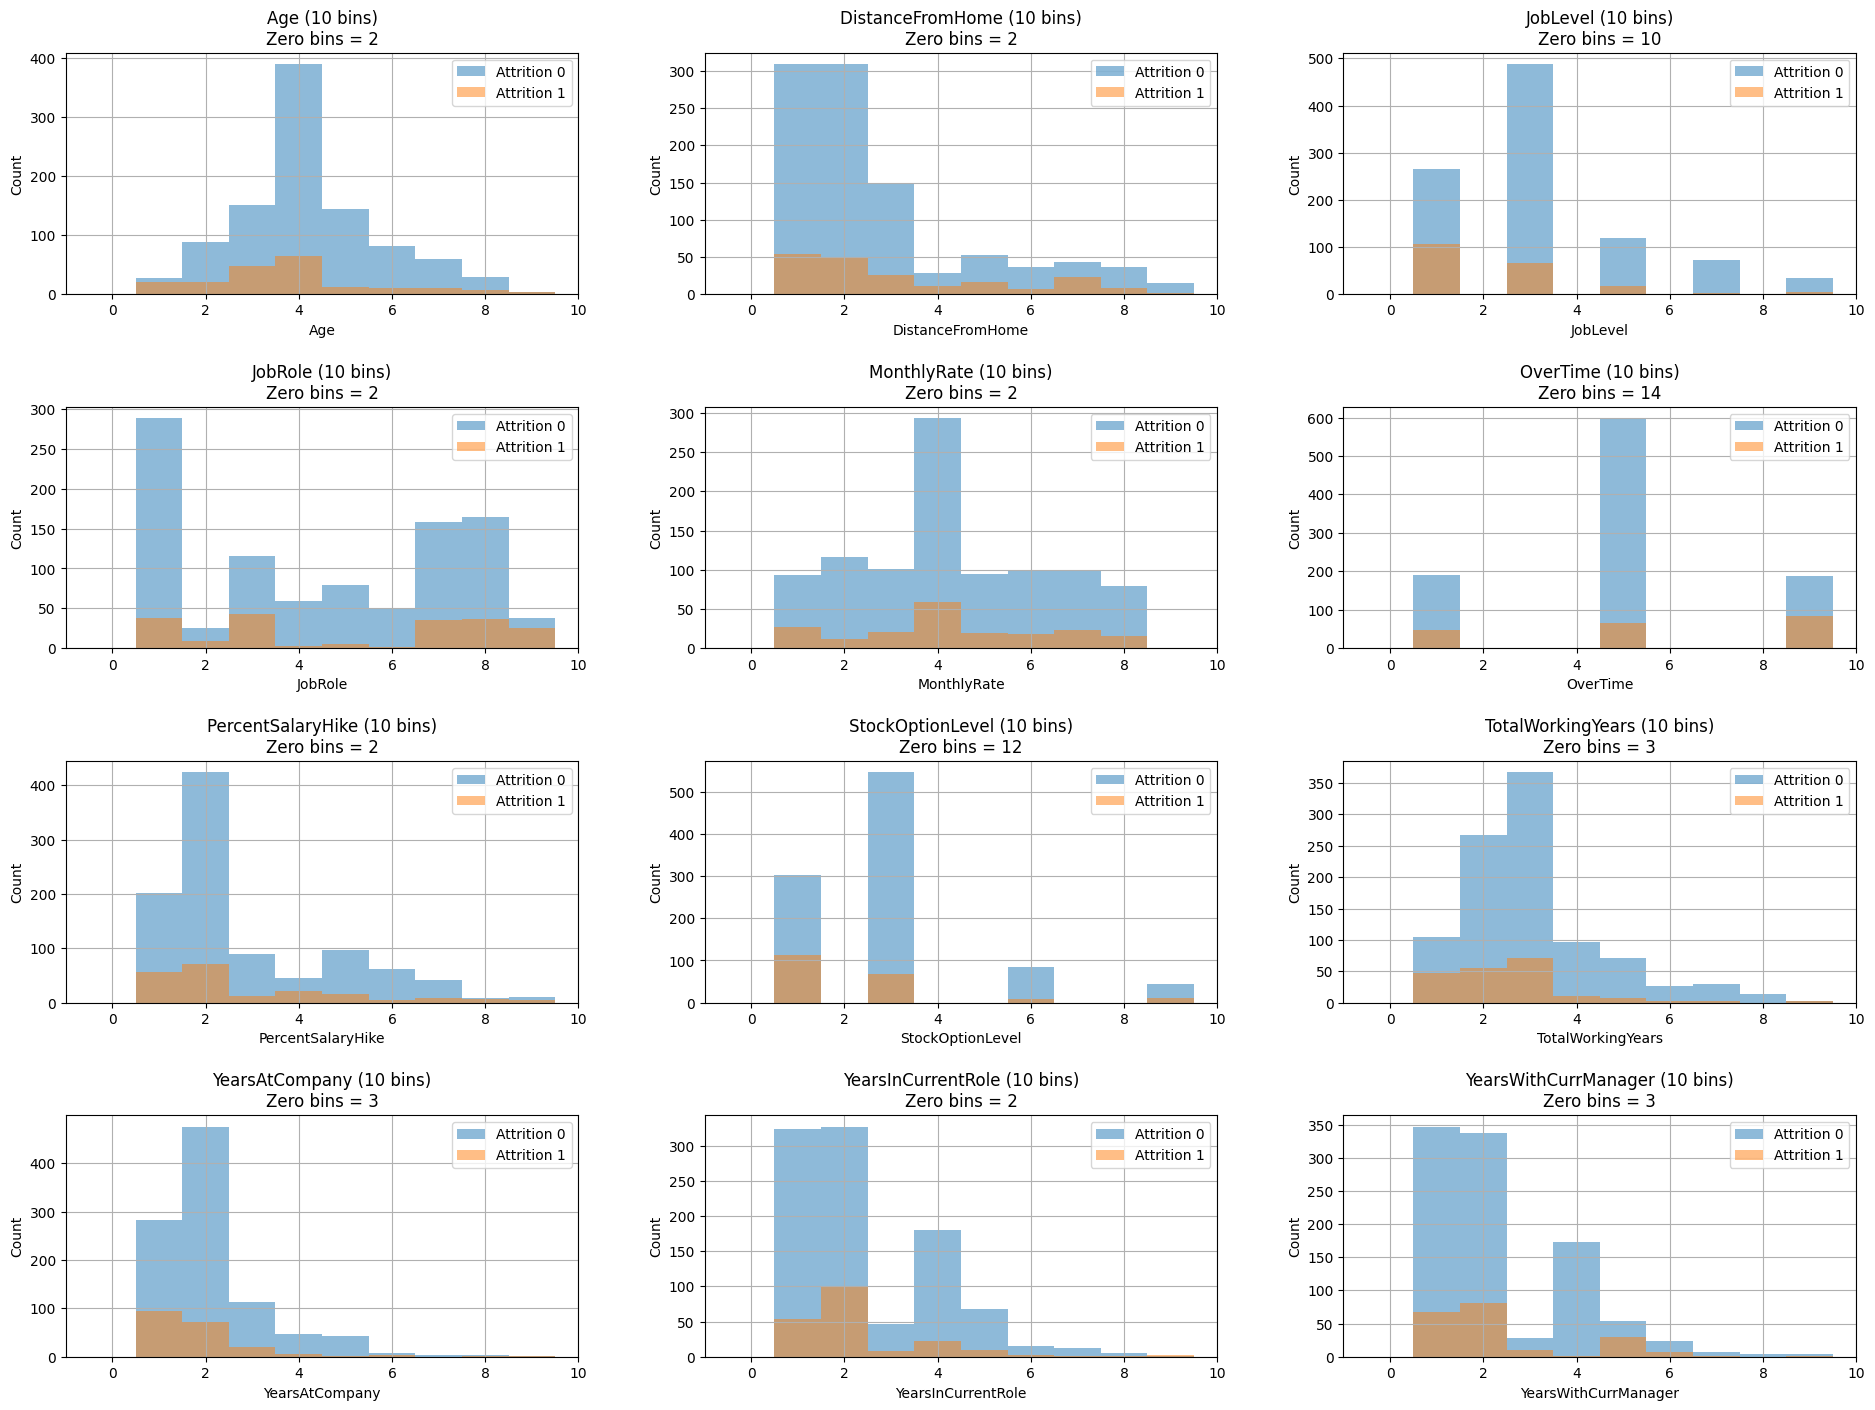

In [15]:
fig, axes = plt.subplots(4, 3, figsize=(20, 15))
fig.tight_layout(pad=6.0)

col_names = [
    "Age",
    "DistanceFromHome",
    "JobLevel",
    "JobRole",
    "MonthlyRate",
    "OverTime",
    "PercentSalaryHike",
    "StockOptionLevel",
    "TotalWorkingYears",
    "YearsAtCompany",
    "YearsInCurrentRole",
    "YearsWithCurrManager"
]

n_bin = 10
attrition_classes = [0, 1]

for i, col_name in enumerate(col_names):
    ax = axes[i // 3, i % 3]

    total_zero_bins = 0

    for cls in attrition_classes:
        data = df_train[df_train["Attrition"] == cls][col_name].values

        counts, bin_edges = discretize_feature(data, n_bin)

        # Plot as bar chart (manual histogram)
        ax.bar(
            range(n_bin),
            counts,
            width=1,
            alpha=0.5,
            label=f"Attrition {cls}"
        )

        zero_bins = np.sum(counts == 0)
        total_zero_bins += zero_bins

    ax.set_xlabel(col_name)
    ax.set_ylabel("Count")
    ax.set_title(f"{col_name} ({n_bin} bins)\nZero bins = {total_zero_bins}")
    ax.legend()
    ax.grid(True)

    print(
        f"Zero-count bins in {col_name}: {total_zero_bins}"
    )

plt.savefig("../images/Histogram-T7-3.png", dpi=300)
plt.show()

---

### Problem T8

Zero-count bins in MonthlyIncome: 3
Zero-count bins in JobRole: 2
Zero-count bins in HourlyRate: 2
Zero-count bins in MaritalStatus: 12


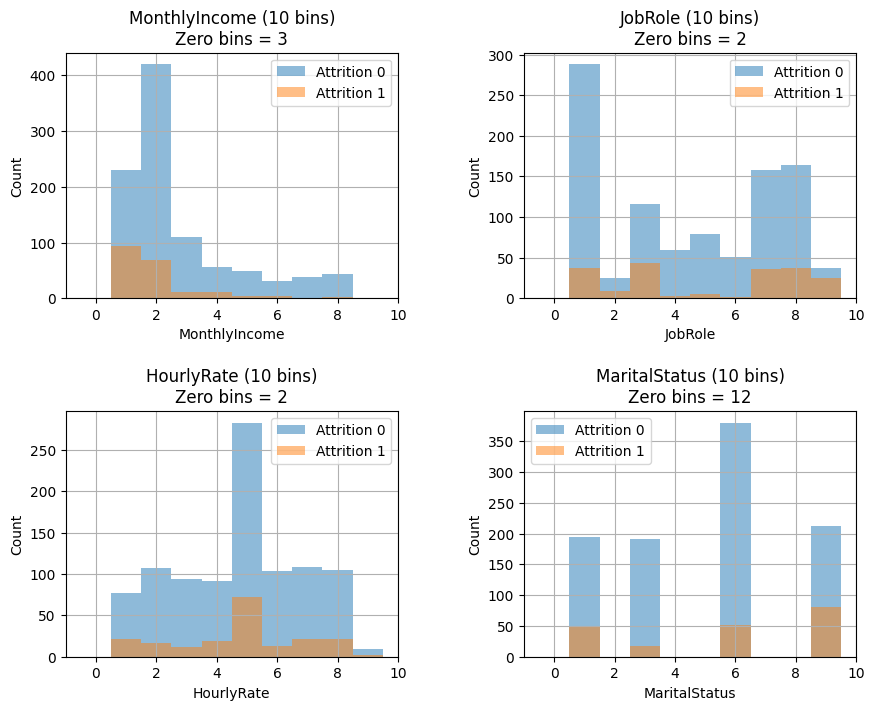

In [16]:
fig, axes = plt.subplots(2, 2, figsize=(10, 8))
fig.tight_layout(pad=6.0)

col_names = ["MonthlyIncome", "JobRole", "HourlyRate", "MaritalStatus"]

n_bin = 10
attrition_classes = [0, 1]

for i, col_name in enumerate(col_names):
    ax = axes[i // 2, i % 2]

    total_zero_bins = 0

    for cls in attrition_classes:
        data = df_train[df_train["Attrition"] == cls][col_name].values

        counts, bin_edges = discretize_feature(data, n_bin)

        # Plot as bar chart (manual histogram)
        ax.bar(
            range(n_bin),
            counts,
            width=1,
            alpha=0.5,
            label=f"Attrition {cls}"
        )

        zero_bins = np.sum(counts == 0)
        total_zero_bins += zero_bins

    ax.set_xlabel(col_name)
    ax.set_ylabel("Count")
    ax.set_title(f"{col_name} ({n_bin} bins)\nZero bins = {total_zero_bins}")
    ax.legend()
    ax.grid(True)

    print(
        f"Zero-count bins in {col_name}: {total_zero_bins}"
    )

plt.savefig("../images/Likelihood-T8.png", dpi=300)
plt.show()

---

### Problem T9

In [17]:
print(df_train["Attrition"].value_counts())
print(df_train["Attrition"].value_counts(normalize=True))

Attrition
0    978
1    198
Name: count, dtype: int64
Attrition
0    0.831633
1    0.168367
Name: proportion, dtype: float64


---

## Simple Naive Bayes Classifier Implementation

In [18]:
import random as rnd
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import stats

class SimpleBayesClassifier:

    def __init__(self, n_pos, n_neg):
        
        """
        Initializes the SimpleBayesClassifier with prior probabilities.

        Parameters:
        n_pos (int): The number of positive samples.
        n_neg (int): The number of negative samples.
        
        Returns:
        None: This method does not return anything as it is a constructor.
        """

        self.n_pos = n_pos
        self.n_neg = n_neg
        self.prior_pos = n_pos / (n_pos + n_neg)
        self.prior_neg = n_neg / (n_pos + n_neg)

    def fit_params(self, x, y, n_bins=10):

        """
        Computes histogram-based parameters for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.
        n_bins (int): Number of bins to use for histogram calculation.

        Returns:
        (stay_params, leave_params): A tuple containing two lists of tuples, 
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the bins and edges of the histogram for a feature.
        """

        self.stay_params = []
        self.leave_params = []

        # INSERT CODE HERE
        for feature_idx in range(x.shape[1]):   
            _, edges  = np.histogram(x[:, feature_idx], bins=n_bins)
            
            stay_counts  = np.histogram(x[y == 0.0, feature_idx], bins=edges)[0]
            leave_counts = np.histogram(x[y == 1.0, feature_idx], bins=edges)[0]
            
            alpha = 1
            stay_probs  = (stay_counts  + alpha) / (np.sum(stay_counts) + alpha * len(stay_counts))
            leave_probs = (leave_counts + alpha) / (np.sum(leave_counts) + alpha * len(leave_counts))
            
            self.stay_params .append((stay_probs, edges))
            self.leave_params.append((leave_probs, edges))
        
        return self.stay_params, self.leave_params

    def predict(self, x, thresh = 0.0):

        """
        Predicts the class labels for the given samples using the non-parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []

        # INSERT CODE HERE
        for sample in x:
            log_stay_prior  = np.log(self.prior_neg)
            log_leave_prior = np.log(self.prior_pos)
            
            log_stay_prob  = log_stay_prior
            log_leave_prob = log_leave_prior
            
            for feature_idx in range(x.shape[1]):
                stay_prob, edges = self.stay_params[feature_idx]
                leave_prob, _    = self.leave_params[feature_idx]
                
                bin = np.digitize(sample[feature_idx], edges, right=False) - 1
                bin = np.clip(bin, 0, len(stay_prob) - 1)
                
                log_stay_prob  += np.log(stay_prob[bin])
                log_leave_prob += np.log(leave_prob[bin])
            
            if (log_leave_prob - log_stay_prob > thresh):
                y_pred.append(1)
            else:
                y_pred.append(0)

        return y_pred
    
    def fit_gaussian_params(self, x, y):

        """
        Computes mean and standard deviation for each feature in the dataset.

        Parameters:
        x (np.ndarray): The feature matrix, where rows are samples and columns are features.
        y (np.ndarray): The target array, where each element corresponds to the label of a sample.

        Returns:
        (gaussian_stay_params, gaussian_leave_params): A tuple containing two lists of tuples,
        one for 'stay' parameters and one for 'leave' parameters.
        Each tuple in the list contains the mean and standard deviation for a feature.
        """

        self.gaussian_stay_params = []
        self.gaussian_leave_params = []

        # INSERT CODE HERE
        for feature_idx in range(x.shape[1]):   
            stay_mean = np.mean(x[y == 0.0, feature_idx])
            stay_std  = np.std(x[y == 0.0, feature_idx])
            print(x[y == 0.0, feature_idx], stay_mean, stay_std)
            
            leave_mean = np.mean(x[y == 1.0, feature_idx])
            leave_std  = np.std(x[y == 1.0, feature_idx])
            
            self.gaussian_stay_params.append((stay_mean, stay_std))
            self.gaussian_leave_params.append((leave_mean, leave_std))
            
        return self.gaussian_stay_params, self.gaussian_leave_params
    
    def gaussian_predict(self, x, thresh = 0):

        """
        Predicts the class labels for the given samples using the parametric model.

        Parameters:
        x (np.ndarray): The feature matrix for which predictions are to be made.
        thresh (float): The threshold for log probability to decide between classes.

        Returns:
        result (list): A list of predicted class labels (0 or 1) for each sample in the feature matrix.
        """

        y_pred = []

        # INSERT CODE HERE
        for sample in x:
            log_stay_prior  = np.log(self.prior_neg)
            log_leave_prior = np.log(self.prior_pos)
            
            log_stay_prob  = log_stay_prior
            log_leave_prob = log_leave_prior
            
            for feature_idx in range(x.shape[1]):
                stay_mean,  stay_std  = self.gaussian_stay_params[feature_idx]
                leave_mean, leave_std = self.gaussian_leave_params[feature_idx]
                
                stay_std = max(stay_std, 1e-9)
                leave_std = max(leave_std, 1e-9)
                
                stay_dist  = stats.Normal(mu=stay_mean,  sigma=stay_std)
                leave_dist = stats.Normal(mu=leave_mean, sigma=leave_std)
                
                log_stay_prob  += stay_dist.logpdf(sample[feature_idx])
                log_leave_prob += leave_dist.logpdf(sample[feature_idx])
                
            if (log_leave_prob - log_stay_prob > thresh):
                y_pred.append(1)
            else:
                y_pred.append(0)

        return y_pred

---

## Problems (contd.)

### Problem T11

In [19]:
data_train = df_train.to_numpy()
data_test = df_test.to_numpy()

In [20]:
x_train = df_train.drop(columns="Attrition").to_numpy()
y_train = df_train["Attrition"].to_numpy()

x_test = df_test.drop(columns="Attrition").to_numpy()
y_test = df_test["Attrition"].to_numpy()

In [21]:
n_pos = df_train["Attrition"].value_counts()[1]
n_neg = df_train["Attrition"].value_counts()[0]

model = SimpleBayesClassifier(n_pos=n_pos, n_neg=n_neg)

In [22]:
def check_prior():
    """
    This function designed to test the implementation of the prior probability calculation in a Naive Bayes classifier. 
    Specifically, it checks if the classifier correctly computes the prior probabilities for the 
    negative and positive classes based on given input counts.
    """
    
    # prior_neg = 5/(5 + 5) = 0.5 and # prior_pos = 5/(5 + 5) = 0.5
    assert (SimpleBayesClassifier(5, 5).prior_pos, SimpleBayesClassifier(5, 5).prior_neg) == (0.5, 0.5)

    assert (SimpleBayesClassifier(3, 5).prior_pos, SimpleBayesClassifier(3, 5).prior_neg) == (3/8, 5/8)
    assert (SimpleBayesClassifier(0, 1).prior_pos, SimpleBayesClassifier(0, 1).prior_neg) == (0.0, 1.0)
    assert (SimpleBayesClassifier(1, 0).prior_pos, SimpleBayesClassifier(1, 0).prior_neg) == (1.0, 0.0)
    
check_prior()

In [23]:
model.fit_params(x_train, y_train)

([(array([0.02226721, 0.05161943, 0.10728745, 0.13562753, 0.35526316,
          0.13360324, 0.07388664, 0.05060729, 0.04757085, 0.02226721]),
   array([18. , 22.2, 26.4, 30.6, 34.8, 39. , 43.2, 47.4, 51.6, 55.8, 60. ])),
  (array([0.19230769, 0.00101215, 0.00101215, 0.08603239, 0.00101215,
          0.00101215, 0.1417004 , 0.00101215, 0.00101215, 0.57388664]),
   array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ])),
  (array([0.09008097, 0.0708502 , 0.07692308, 0.09412955, 0.25809717,
          0.07995951, 0.07287449, 0.0840081 , 0.08805668, 0.08502024]),
   array([ 102. ,  241.4,  380.8,  520.2,  659.6,  799. ,  938.4, 1077.8,
          1217.2, 1356.6, 1496. ])),
  (array([0.19230769, 0.00101215, 0.00101215, 0.0354251 , 0.00101215,
          0.00101215, 0.54048583, 0.00101215, 0.00101215, 0.2257085 ]),
   array([-1. , -0.7, -0.4, -0.1,  0.2,  0.5,  0.8,  1.1,  1.4,  1.7,  2. ])),
  (array([0.27834008, 0.10323887, 0.33299595, 0.07894737, 0.01619433,
          0.03

In [24]:
def check_fit_params():

    """
    This function is designed to test the fit_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is bins and edges from each histogram.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {STAY_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {STAY_PARAMS_1[f_idx][1]}")
    
    print("")
    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"BINS : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"EDGES : {LEAVE_PARAMS_1[f_idx][1]}")

check_fit_params()

STAY PARAMETERS
Feature : 0
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.16666667 0.08333333 0.08333333 0.08333333]
EDGES : [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]
Feature : 1
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.16666667 0.08333333 0.08333333 0.08333333]
EDGES : [1.  1.3 1.6 1.9 2.2 2.5 2.8 3.1 3.4 3.7 4. ]
Feature : 2
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.16666667 0.08333333 0.08333333 0.08333333]
EDGES : [2.  2.3 2.6 2.9 3.2 3.5 3.8 4.1 4.4 4.7 5. ]
Feature : 3
BINS : [0.16666667 0.08333333 0.08333333 0.08333333 0.08333333 0.08333333
 0.16666667 0.08333333 0.08333333 0.08333333]
EDGES : [3.  3.3 3.6 3.9 4.2 4.5 4.8 5.1 5.4 5.7 6. ]

LEAVE PARAMETERS
Feature : 0
BINS : [0.08333333 0.08333333 0.08333333 0.16666667 0.08333333 0.08333333
 0.08333333 0.08333333 0.08333333 0.16666667]
EDGES : [0.  0.3 0.6 0.9 1.2 1.5 1.8 2.1 2.4 2.7 3. ]
Feature : 1
BINS : [0.08333333 0.083

In [25]:
y_pred = model.predict(x = x_test)

In [26]:
def evaluate(y_true, y_pred, show_result = True):
    
    """
    This function evaluates the performance of a classification model by calculating various metrics such as Accuracy, Precision, Recall, F1 Score, and False Positive Rate. 
    It takes the true labels and predicted labels as input and computes these metrics to assess how well the model is performing.
    """

    accuracy = np.mean(np.array(y_true) == np.array(y_pred))
    
    tp = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 1))
    fp = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 1))
    fn = np.sum((np.array(y_true) == 1) & (np.array(y_pred) == 0))
    tn = np.sum((np.array(y_true) == 0) & (np.array(y_pred) == 0))
    fpr = fp / (fp + tn) if (fp + tn) > 0 else 0

    precision = tp / (tp + fp) if (tp + fp) > 0 else 0
    recall = tp / (tp + fn) if (tp + fn) > 0 else 0
    f1_score = 2 * (precision * recall) / (precision + recall) if (precision + recall) > 0 else 0

    if show_result:
        print(f"Accuracy: {accuracy:.4f}")
        print(f"Precision: {precision:.4f}")
        print(f"Recall: {recall:.4f}")
        print(f"F1 Score: {f1_score:.4f}")
        print(f"False Positive Rate: {fpr:.4f}")
    
    return accuracy, precision, recall, f1_score, fpr

In [27]:
evaluate(y_test, y_pred)

Accuracy: 0.8605
Precision: 0.4667
Recall: 0.3590
F1 Score: 0.4058
False Positive Rate: 0.0627


(np.float64(0.8605442176870748),
 np.float64(0.4666666666666667),
 np.float64(0.358974358974359),
 np.float64(0.40579710144927544),
 np.float64(0.06274509803921569))

---

### Problem T12


In [28]:
model.fit_gaussian_params(x_train, y_train)

[24. 18. 29. 39. 31. 36. 34. 45. 23. 36. 36. 36. 36. 24. 38. 33. 36. 31.
 52. 45. 44. 28. 46. 58. 36. 36. 37. 36. 36. 44. 36. 44. 36. 34. 44. 54.
 43. 36. 36. 28. 37. 38. 26. 46. 29. 29. 26. 24. 48. 38. 36. 36. 42. 45.
 24. 34. 26. 25. 36. 20. 26. 37. 36. 36. 47. 29. 36. 34. 27. 32. 50. 30.
 26. 36. 43. 31. 35. 22. 44. 36. 36. 36. 36. 47. 36. 58. 36. 40. 54. 31.
 38. 38. 28. 26. 36. 32. 37. 29. 36. 36. 30. 31. 34. 44. 31. 38. 25. 35.
 36. 36. 39. 35. 41. 36. 36. 33. 36. 36. 54. 37. 36. 49. 36. 27. 39. 50.
 36. 50. 52. 47. 22. 33. 40. 27. 40. 55. 34. 46. 36. 36. 36. 34. 36. 35.
 36. 40. 36. 53. 32. 55. 30. 51. 42. 35. 35. 28. 29. 43. 40. 29. 46. 47.
 32. 36. 51. 58. 35. 36. 56. 37. 37. 39. 35. 54. 32. 48. 33. 46. 38. 36.
 43. 37. 36. 35. 30. 39. 36. 27. 42. 31. 29. 49. 38. 35. 36. 34. 36. 36.
 40. 34. 43. 31. 41. 36. 45. 33. 27. 36. 33. 31. 32. 36. 37. 28. 25. 29.
 41. 36. 36. 31. 45. 42. 36. 36. 34. 33. 35. 40. 33. 36. 34. 36. 36. 45.
 37. 36. 32. 28. 36. 33. 38. 41. 38. 36. 53. 30. 36

([(np.float64(37.23108384458078), np.float64(7.901216225600071)),
  (np.float64(1.1063394683026584), np.float64(1.1942862844988418)),
  (np.float64(800.4095092024539), np.float64(367.6914943425052)),
  (np.float64(0.8057259713701431), np.float64(0.9985101040929906)),
  (np.float64(8.64723926380368), np.float64(7.298016198638872)),
  (np.float64(2.936605316973415), np.float64(0.9279072092674917)),
  (np.float64(1.5756646216768917), np.float64(1.7598396521339128)),
  (np.float64(2.807770961145194), np.float64(0.9666530607049469)),
  (np.float64(0.25766871165644173), np.float64(0.7708038222367757)),
  (np.float64(66.48159509202453), np.float64(18.33627515098791)),
  (np.float64(2.801635991820041), np.float64(0.6310939170359051)),
  (np.float64(2.1022494887525562), np.float64(0.9947587858621009)),
  (np.float64(3.273006134969325), np.float64(3.1071701763944053)),
  (np.float64(2.810838445807771), np.float64(0.9814251940561006)),
  (np.float64(0.6257668711656442), np.float64(1.0327117373996

In [29]:
def check_fit_gaussian_params():

    """
    This function is designed to test the fit_gaussian_params method of a SimpleBayesClassifier. 
    This method is presumably responsible for computing parameters for a Naive Bayes classifier 
    based on the provided training data. The parameters in this context is mean and STD.
    """

    T = SimpleBayesClassifier(2, 2)
    X_TRAIN_CASE_1 = np.array([
        [0, 1, 2, 3],
        [1, 2, 3, 4],
        [2, 3, 4, 5],
        [3, 4, 5, 6]
    ])
    Y_TRAIN_CASE_1 = np.array([0, 1, 0, 1])
    STAY_PARAMS_1, LEAVE_PARAMS_1 = T.fit_gaussian_params(X_TRAIN_CASE_1, Y_TRAIN_CASE_1)

    print("STAY PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {STAY_PARAMS_1[f_idx][0]}")
        print(f"STD. : {STAY_PARAMS_1[f_idx][1]}")
    print("")    
    print("LEAVE PARAMETERS")
    for f_idx in range(len(STAY_PARAMS_1)):
        print(f"Feature : {f_idx}")
        print(f"Mean : {LEAVE_PARAMS_1[f_idx][0]}")
        print(f"STD. : {LEAVE_PARAMS_1[f_idx][1]}")
    
check_fit_gaussian_params()

[0 2] 1.0 1.0
[1 3] 2.0 1.0
[2 4] 3.0 1.0
[3 5] 4.0 1.0
STAY PARAMETERS
Feature : 0
Mean : 1.0
STD. : 1.0
Feature : 1
Mean : 2.0
STD. : 1.0
Feature : 2
Mean : 3.0
STD. : 1.0
Feature : 3
Mean : 4.0
STD. : 1.0

LEAVE PARAMETERS
Feature : 0
Mean : 2.0
STD. : 1.0
Feature : 1
Mean : 3.0
STD. : 1.0
Feature : 2
Mean : 4.0
STD. : 1.0
Feature : 3
Mean : 5.0
STD. : 1.0


In [30]:
y_pred = model.gaussian_predict(x_test)

In [31]:
evaluate(y_test, y_pred)

Accuracy: 0.8197
Precision: 0.3600
Recall: 0.4615
F1 Score: 0.4045
False Positive Rate: 0.1255


(np.float64(0.8197278911564626),
 np.float64(0.36),
 np.float64(0.46153846153846156),
 np.float64(0.4044943820224719),
 np.float64(0.12549019607843137))

---

### Problem T13

In [32]:
y_pred = np.random.randint(0, 2, len(y_test))
evaluate(y_test, y_pred)

Accuracy: 0.4524
Precision: 0.0987
Recall: 0.3846
F1 Score: 0.1571
False Positive Rate: 0.5373


(np.float64(0.4523809523809524),
 np.float64(0.09868421052631579),
 np.float64(0.38461538461538464),
 np.float64(0.15706806282722516),
 np.float64(0.5372549019607843))

---

### Problem T14

In [33]:
most_frequent_class = np.argmax(np.bincount(y_train.astype(int)))

y_pred = np.full_like(y_test, most_frequent_class)
evaluate(y_test, y_pred)

Accuracy: 0.8673
Precision: 0.0000
Recall: 0.0000
F1 Score: 0.0000
False Positive Rate: 0.0000


(np.float64(0.8673469387755102), 0, np.float64(0.0), 0, np.float64(0.0))

---

### Problem T16


In [34]:
model.fit_params(x_train, y_train)

t = np.arange(-5, 5, 0.05)
best_accuracy = 0
best_accuracy_thresh = 0

best_f1_score = 0
best_f1_score_thresh = 0

for thresh in t:
    y_pred = model.predict(x_test, thresh=float(thresh))
    
    accuracy = evaluate(y_test, y_pred, show_result=False)[0]
    f1_score = evaluate(y_test, y_pred, show_result=False)[3]
    
    if accuracy > best_accuracy:
        best_accuracy = accuracy
        best_accuracy_thresh = thresh
        
    if f1_score > best_f1_score:
        best_f1_score = f1_score
        best_f1_score_thresh = thresh

print(f"Best Accuracy: {best_accuracy:.4f} at Threshold: {best_accuracy_thresh:.2f}")
print(f"Best F1 Score: {best_f1_score:.4f} at Threshold: {best_f1_score_thresh:.2f}")

Best Accuracy: 0.8776 at Threshold: 1.65
Best F1 Score: 0.4179 at Threshold: 0.15


---

### Problem T17

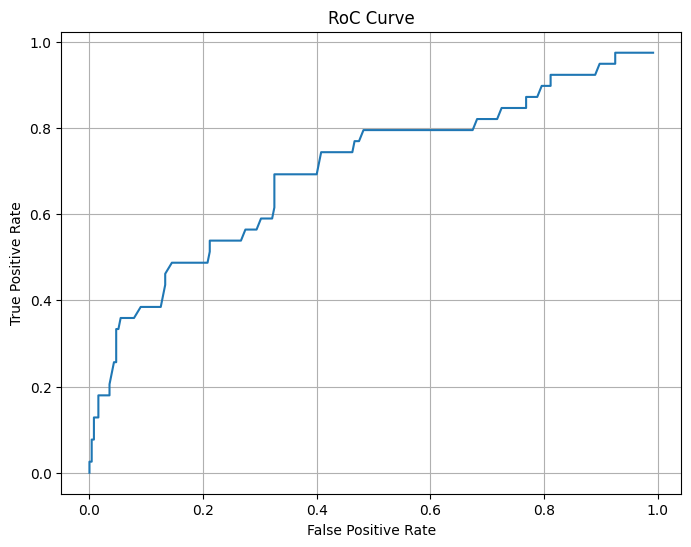

In [35]:
t = np.arange(-10, 10, 0.05)

tprs = []
fprs = []

for thresh in t:
    y_pred = model.predict(x_test, thresh=float(thresh))
    
    eval_results = evaluate(y_test, y_pred, show_result=False)
    tpr = eval_results[2]
    fpr = eval_results[4]
    
    tprs.append(tpr)
    fprs.append(fpr)

plt.figure(figsize=(8, 6))

plt.plot(fprs, tprs)

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC Curve")
plt.grid()

plt.savefig("../images/RoC-T17.png", dpi=300)
plt.show()

---

### Problem T18

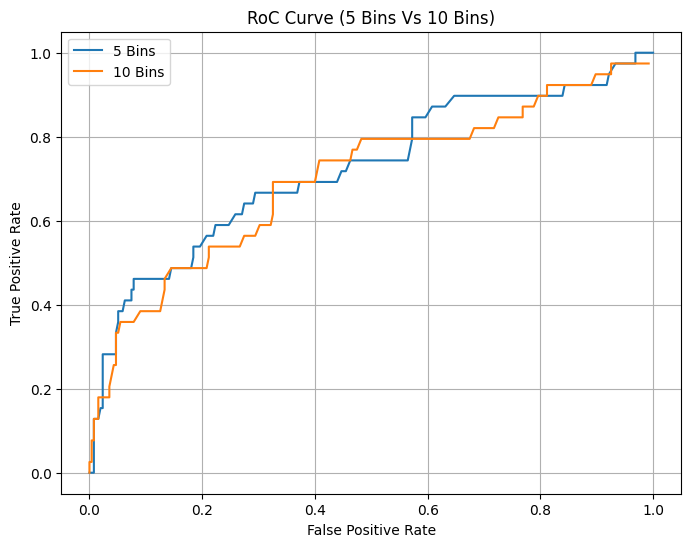

In [36]:
tprs_10 = tprs
fprs_10 = fprs

model = SimpleBayesClassifier(n_pos=n_pos, n_neg=n_neg)
model.fit_params(x_train, y_train, n_bins=5)

t = np.arange(-10, 10, 0.05)

tprs_5 = []
fprs_5 = []

for thresh in t:
    y_pred = model.predict(x_test, thresh=float(thresh))
    
    eval_results = evaluate(y_test, y_pred, show_result=False)
    tpr = eval_results[2]
    fpr = eval_results[4]
    
    tprs_5.append(tpr)
    fprs_5.append(fpr)

plt.figure(figsize=(8, 6))

plt.plot(fprs_5, tprs_5)
plt.plot(fprs_10, tprs_10)
plt.legend(["5 Bins", "10 Bins"])

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("RoC Curve (5 Bins Vs 10 Bins)")
plt.grid()

plt.savefig("../images/RoC-T18.png", dpi=300)
plt.show()

---

### Problem OT4

In [37]:
x_train = df_train.drop(columns="Attrition").to_numpy()
y_train = df_train["Attrition"].to_numpy()

x_test = df_test.drop(columns="Attrition").to_numpy()
y_test = df_test["Attrition"].to_numpy()

n_pos = df_train["Attrition"].value_counts()[1]
n_neg = df_train["Attrition"].value_counts()[0]

model = SimpleBayesClassifier(n_pos=n_pos, n_neg=n_neg)

accuracy_list = []

for seed in range(10):
    np.random.seed(seed)
    
    x_train_shuffled = x_train.copy()
    y_train_shuffled = y_train.copy()
    
    np.random.shuffle(x_train_shuffled)
    np.random.shuffle(y_train_shuffled)
    
    x_test_shuffled = x_test.copy()
    y_test_shuffled = y_test.copy()
    
    np.random.shuffle(x_test_shuffled)
    np.random.shuffle(y_test_shuffled)
    
    model.fit_params(x_train_shuffled, y_train_shuffled, n_bins=10)
    y_pred = model.predict(x_test_shuffled, thresh=0.0)
    
    accuracy = evaluate(y_test_shuffled, y_pred, show_result=False)[0]
    accuracy_list.append(accuracy)
    
    print(f"Seed: {seed}, Accuracy: {accuracy}")

print("\nSummary of Accuracy over 10 runs:")
print(f"Average Accuracy over 10 runs: {np.mean(accuracy_list):.4f}")
print(f"Standard Deviation of Accuracy over 10 runs: {np.std(accuracy_list):.4f}")
print(f"Variance of Accuracy over 10 runs: {np.var(accuracy_list):.4f}")

Seed: 0, Accuracy: 0.8605442176870748
Seed: 1, Accuracy: 0.8639455782312925
Seed: 2, Accuracy: 0.8673469387755102
Seed: 3, Accuracy: 0.8435374149659864
Seed: 4, Accuracy: 0.8673469387755102
Seed: 5, Accuracy: 0.8673469387755102
Seed: 6, Accuracy: 0.8333333333333334
Seed: 7, Accuracy: 0.8435374149659864
Seed: 8, Accuracy: 0.8435374149659864
Seed: 9, Accuracy: 0.8605442176870748

Summary of Accuracy over 10 runs:
Average Accuracy over 10 runs: 0.8551
Standard Deviation of Accuracy over 10 runs: 0.0121
Variance of Accuracy over 10 runs: 0.0001


---